In [1]:
#Data assimilation in chaotic systems through one way diffusive coupling
#Authors: Apolline Bard and Gantumur Tsogtgerel
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rn
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#one step of RK4 method
def rk4step(f,t,x,h):
    halfh = .5*h
    s1 = f(t, x)
    s2 = f(t + halfh, x + halfh*s1)
    s3 = f(t + halfh, x + halfh*s2)
    s4 = f(t + h, x + h*s3)
    return x + (s1 + 2*s2 + 2*s3 + s4) * h/6.

#ODE solver
def solver(f,a,b,ya,n,step):
    h = float(b - a)/n
    y = ya
    t = a
    yy = []
    yy.append(y)
    tt = []
    tt.append(t)
    for i in range(n):
        t += h
        y = step(f,t,y,h)
        yy.append(y)
        tt.append(t)
    return yy,tt

In [3]:
#Uniform noise
def unoise(eps,n=1):
    return np.array([2*eps*rn.random()-eps for i in range(n)])

#Gaussian noise
def gnoise(var,n=1):
    return np.array([rn.gauss(0,var) for i in range(n)])

In [4]:
#Lorenz system
sigma = 10
beta = 8./3
rho = 28
def lorenz(t,x):
    return np.array([sigma*(x[1]-x[0]),x[0]*(rho-x[2])-x[1],x[0]*x[1]-beta*x[2]])

#Diffusive, one way coupling between two Lorenz systems
gamma = np.array([10,0,0])#x-drive
def lorenz2(t,x):
    return np.concatenate((lorenz(t,x[:3]),lorenz(t,x[3:])+np.multiply(gamma,x[:3]-x[3:])))

#Diffusive, one way coupling with uniform noise between two Lorenz systems
gamma = np.array([10,0,0])#x-drive
eps = .001#noise level
def lorenz2u(t,x):
    return np.concatenate((lorenz(t,x[:3]),lorenz(t,x[3:])+np.multiply(gamma,x[:3]-x[3:]+unoise(eps,3))))

#Diffusive, one way coupling with Gaussian noise between two Lorenz systems
gamma = np.array([10,0,0])#x-drive
eps = .001#noise level
def lorenz2g(t,x):
    return np.concatenate((lorenz(t,x[:3]),lorenz(t,x[3:])+np.multiply(gamma,x[:3]-x[3:]+gnoise(eps,3))))

In [5]:
#Rössler system
a = 0.1
b = 0.1
c = 14
def rossler(t,x):
    return np.array([-x[1]-x[2],x[0]+a*x[1],b+x[2]*(x[0]-c)])

#Diffusive, one way coupling between two Rossler systems
gamma = np.array([10,0,0])#x-drive
def rossler2(t,x):
    return np.concatenate((rossler(t,x[:3]),rossler(t,x[3:])+np.multiply(gamma,x[:3]-x[3:])))

#Diffusive, one way coupling with uniform noise between two Rossler systems
gamma = np.array([10,0,0])#x-drive
eps = .001#noise level
def rossler2u(t,x):
    return np.concatenate((rossler(t,x[:3]),rossler(t,x[3:])+np.multiply(gamma,x[:3]-x[3:]+unoise(eps,3))))

#Diffusive, one way coupling with Gaussian noise between two Rossler systems
gamma = np.array([10,0,0])#x-drive
eps = .001#noise level
def rossler2g(t,x):
    return np.concatenate((rossler(t,x[:3]),rossler(t,x[3:])+np.multiply(gamma,x[:3]-x[3:]+gnoise(eps,3))))

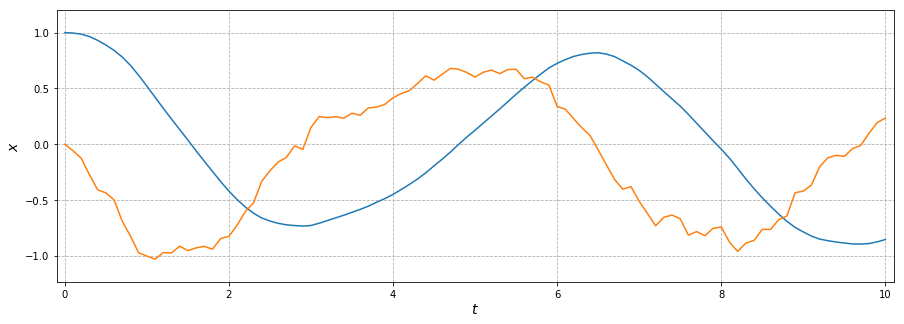

In [176]:
#Example 1a: harmonic oscillator with random forcing x'' + x = Uniform
eps=2
rn.seed(1)
y,t=solver(lambda t,x:np.array([x[1],-x[0]+unoise(eps)]),0,10,np.array([1,0]),100,rk4step)
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,y)
plt.margins(.01,.1)
plt.xlabel('$t$',size=14)
plt.ylabel('$x$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

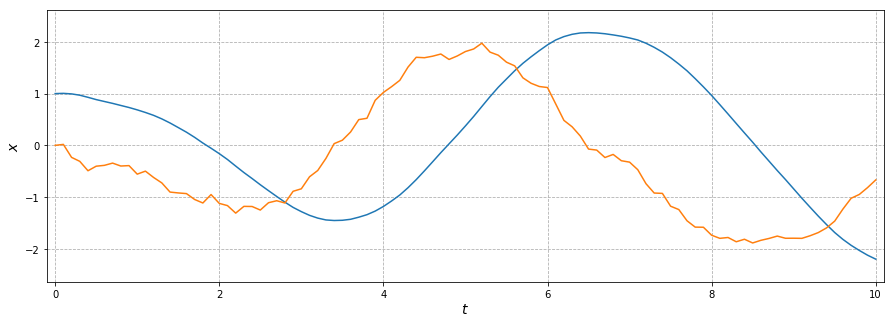

In [177]:
#Example 1b: harmonic oscillator with Gaussian random forcing x'' + x = G
eps=2
rn.seed(1)
y,t=solver(lambda t,x:np.array([x[1],-x[0]+gnoise(eps)]),0,10,np.array([1,0]),100,rk4step)
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,y)
plt.margins(.01,.1)
plt.xlabel('$t$',size=14)
plt.ylabel('$x$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

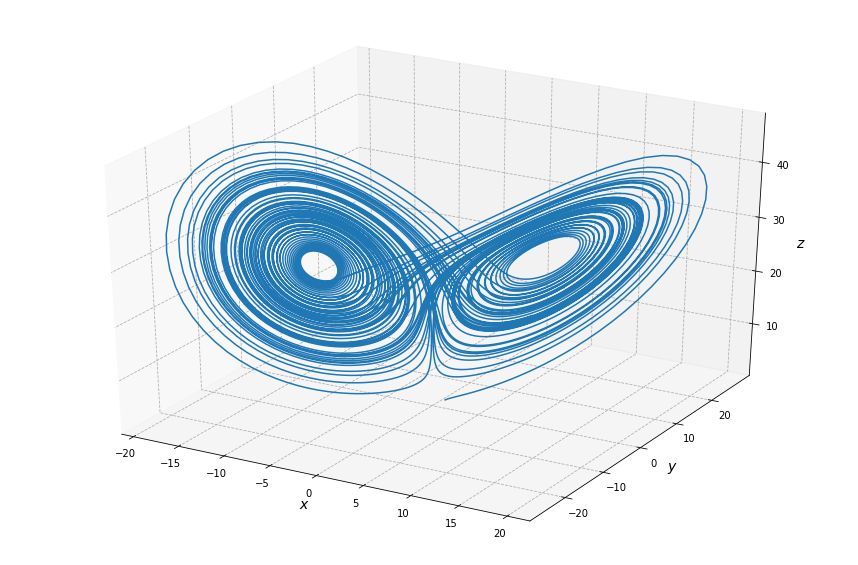

In [119]:
#Example 2: Lorenz system
x,t=solver(lorenz,0,80,np.array([1,1,1]),10000,rk4step)
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot([xi[0] for xi in x],[xi[1] for xi in x],[xi[2] for xi in x])
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$y$',size=14)
ax.set_zlabel('$z$',size=14)
plt.show()

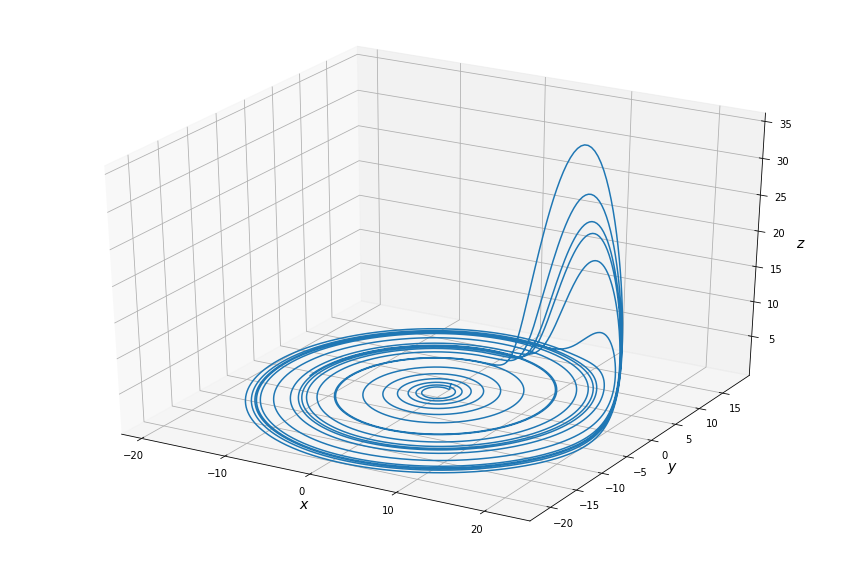

In [10]:
#Example 3: Rossler system
x,t=solver(rossler,0,120,np.array([1,1,1]),10000,rk4step)
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot([xi[0] for xi in x],[xi[1] for xi in x],[xi[2] for xi in x])
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$y$',size=14)
ax.set_zlabel('$z$',size=14)
plt.show()

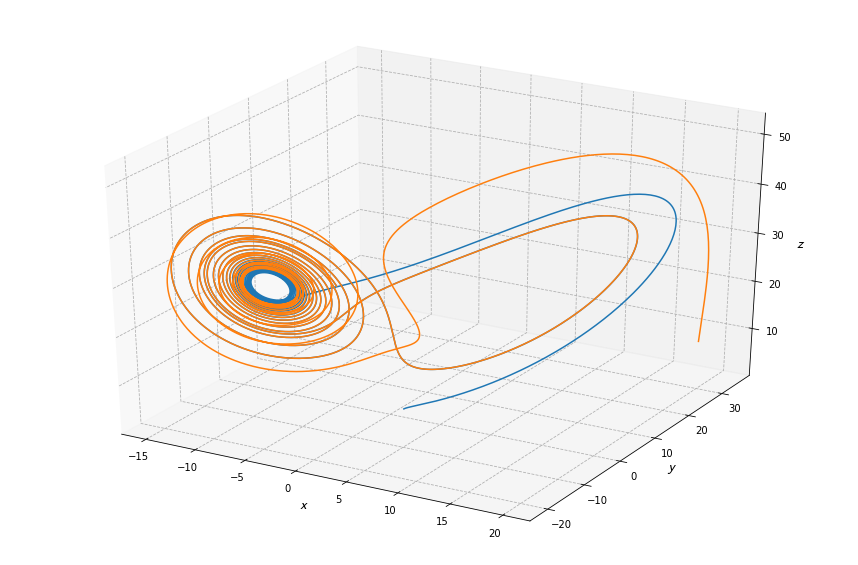

In [91]:
#Example 4: Synchronization of Lorenz systems
T = 15
gamma = np.array([9,0,0])#x-drive
eps = .1
x,t=solver(lorenz2g,0,T,np.array([1,1,1,20,30,10]),10000,rk4step)
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot([xi[0] for xi in x],[xi[1] for xi in x],[xi[2] for xi in x])
ax.plot([xi[3] for xi in x],[xi[4] for xi in x],[xi[5] for xi in x])
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$y$',size=14)
ax.set_zlabel('$z$',size=14)
plt.show()

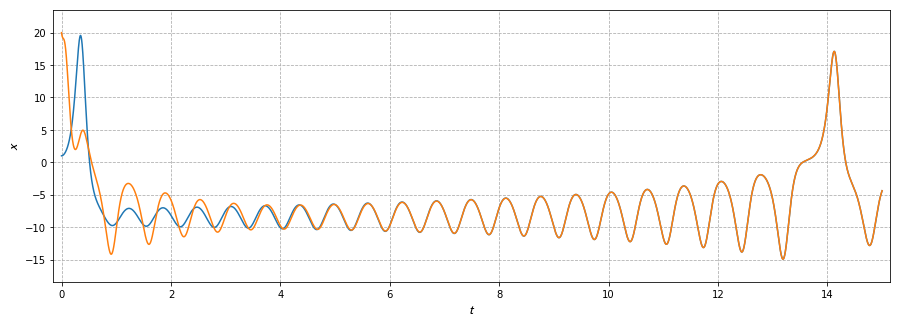

In [79]:
#x-component
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,[xi[0] for xi in x])
plt.plot(t,[xi[3] for xi in x])
plt.xlabel('$t$',size=14)
plt.ylabel('$x$',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

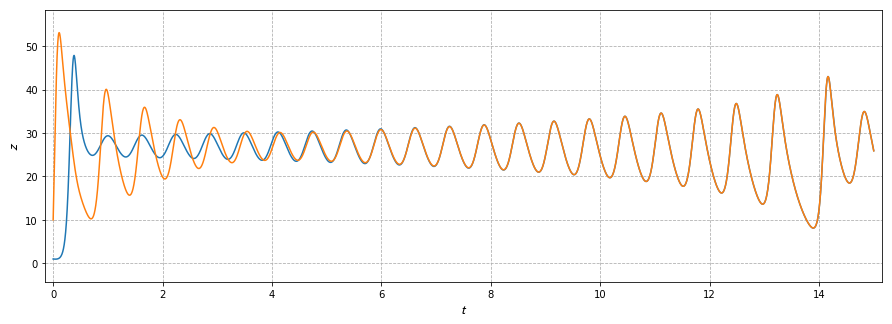

In [80]:
#z-component
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,[xi[2] for xi in x])
plt.plot(t,[xi[5] for xi in x])
plt.xlabel('$t$',size=14)
plt.ylabel('$z$',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

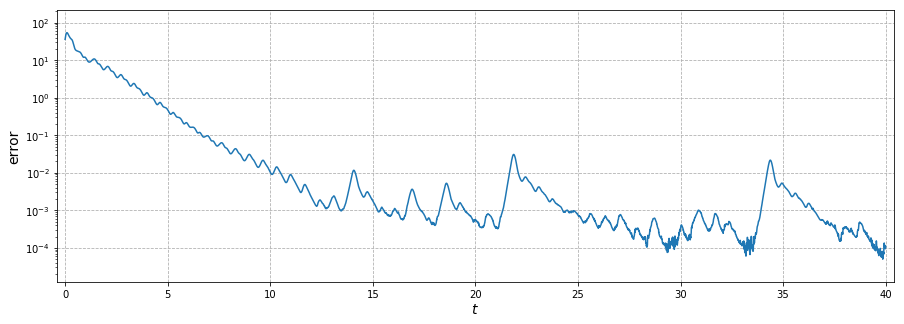

In [189]:
#Error
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
T = 40
eps = .001
gamma = np.array([10,0,0])#x-drive
#gamma = np.array([0,7,0])#y-drive
#gamma = np.array([0,0,6])#z-drive
x,t=solver(lorenz2g,0,T,np.array([1,1,1,20,30,10]),5000,rk4step)
plt.plot(t,[np.linalg.norm(xi[:3]-xi[3:]) for xi in x])
plt.semilogy()
plt.xlabel('$t$',size=14)
plt.ylabel('error',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

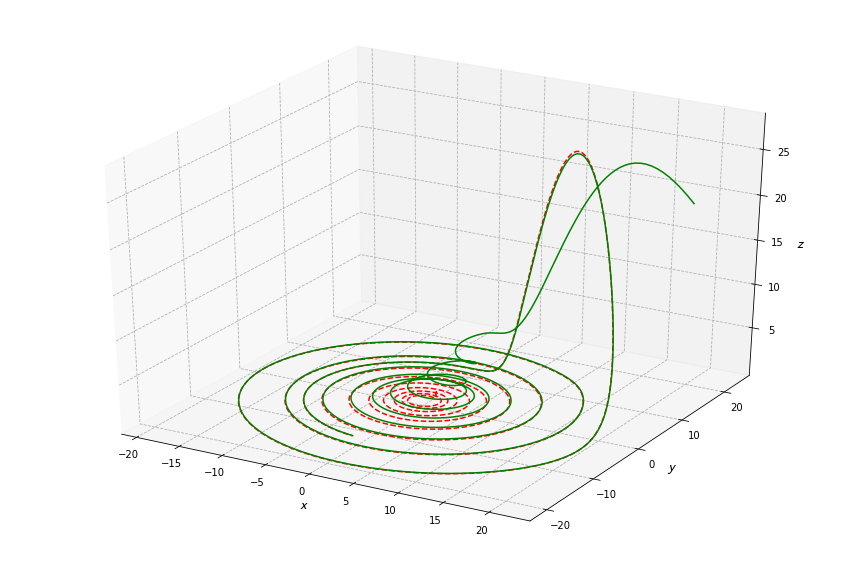

In [69]:
#Example 5: Synchronization of Rossler systems
T = 60
gamma = np.array([5,0,0])#x-drive
eps = .1
x,t=solver(rossler2,0,T,np.array([1,1,1,20,20,20]),10000,rk4step)
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot([xi[0] for xi in x],[xi[1] for xi in x],[xi[2] for xi in x],'r--')
ax.plot([xi[3] for xi in x],[xi[4] for xi in x],[xi[5] for xi in x],'g')
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$y$',size=14)
ax.set_zlabel('$z$',size=14)
plt.show()

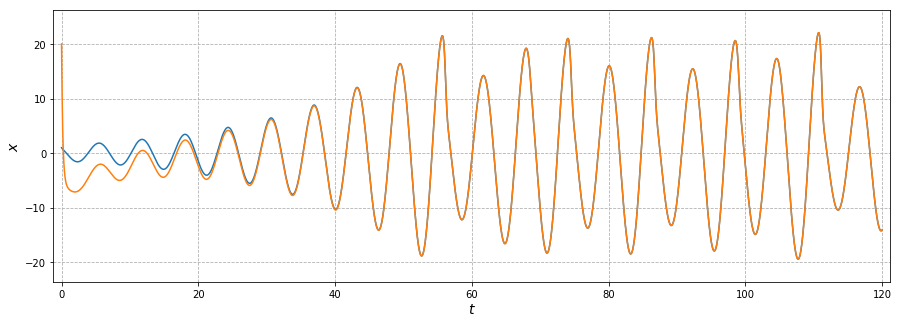

In [33]:
#x-component
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,[xi[0] for xi in x])
plt.plot(t,[xi[3] for xi in x])
plt.xlabel('$t$',size=14)
plt.ylabel('$x$',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

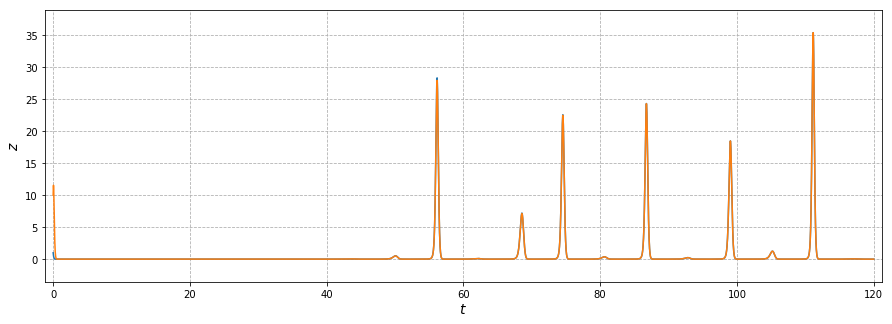

In [34]:
#z-component
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,[xi[2] for xi in x])
plt.plot(t,[xi[5] for xi in x])
plt.xlabel('$t$',size=14)
plt.ylabel('$z$',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

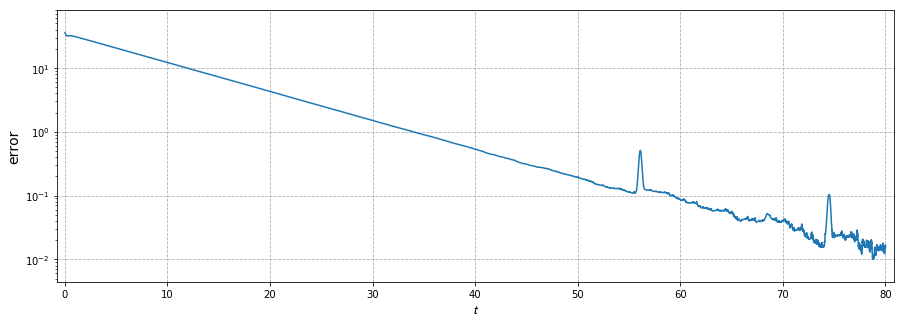

In [47]:
#Error
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
T = 80
eps = .1
#gamma = np.array([20,0,0])#x-drive
#gamma = np.array([0,2,0])#y-drive
#gamma = np.array([0,0,200])#z-drive
x,t=solver(rossler2g,0,T,np.array([1,1,1,20,30,10]),10000,rk4step)
plt.plot(t,[np.linalg.norm(xi[:3]-xi[3:]) for xi in x])
plt.semilogy()
plt.xlabel('$t$',size=14)
plt.ylabel('error',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

Consider the Lorenz system
$$
\begin{cases}
\dot{x}=\sigma(y-x)\\
\dot y=rx-xz-y\\
\dot z=xy-bz
\end{cases}
$$
and a model system
$$
\begin{cases}
\dot x'=\sigma(y'-x')+\gamma(x-x')\\
\dot y'=rx'-x'z'-y'\\
\dot z'=x'y'-bz'
\end{cases}
$$
where $\gamma>0$ is the couling strength. We subtract the second system from the first, to get an equation for the error:
$$
\begin{cases}
\dot e_1=\sigma(e_2-e_1)-\gamma e_1\\
\dot e_2=re_1-xe_3-z'e_1-e_2\\
\dot e_3=xe_2+y'e_1-be_3
\end{cases}
$$
where $e_1=x-x'$, $e_2=y-y'$, and $e_3=z-z'$. Now we compute the time derivative of $E=e_1^2+e_2^2+e_3^2$, hoping that it will be negative, therefore implying that the error will tend to 0:
$$
\frac12\dot E = e_1\dot e_1+e_2\dot e_2+e_3\dot e_3 = -(\gamma+\sigma)e_1^2-e_2^2-be_3^2+(\sigma+r-z')e_1e_2+y'e_1e_3
$$
Assume that $|y'|\leq M$ and $|z'|\leq M$ for some constant $M$. Then we use the inequality
$$
AB\leq\varepsilon A^2 + \frac{B^2}{4\varepsilon} 
$$
for small $\varepsilon>0$, to bound the $e_1e_2$ and $e_1e_3$ terms, as
$$
|(\sigma+r-z')e_1e_2|\leq \varepsilon e_2^2+\frac{(\sigma+r+M)^2}{4\varepsilon}e_1^2
$$
and
$$
|y'e_1e_3|\leq\varepsilon e_3^2+\frac{M^2}{4\varepsilon}e_1^2
$$
We substitute these estimates into the equation for $\dot E$, to get
$$
\frac12\dot E \leq -(1-\varepsilon)e_2^2-(b-\varepsilon)e_3^2 - \Big(\gamma+\sigma-\frac{(\sigma+r+M)^2}{4\varepsilon}-\frac{M^2}{4\varepsilon}\Big) e_1^2
$$
We can choose $\varepsilon<\min\{1,b\}$, and then choose the coupling strength $\gamma$ large enough such that
$$
\gamma+\sigma>\frac{(\sigma+r+M)^2}{4\varepsilon}+\frac{M^2}{4\varepsilon}
$$
This will guarantee that 
$$
\dot E \leq - c (e_1^2+e_2^2+e_3^2) = - cE 
$$
for some constant $c>0$, and therefore induce an exponential decrease of $E$.